# <b> Clustering: Customers identification

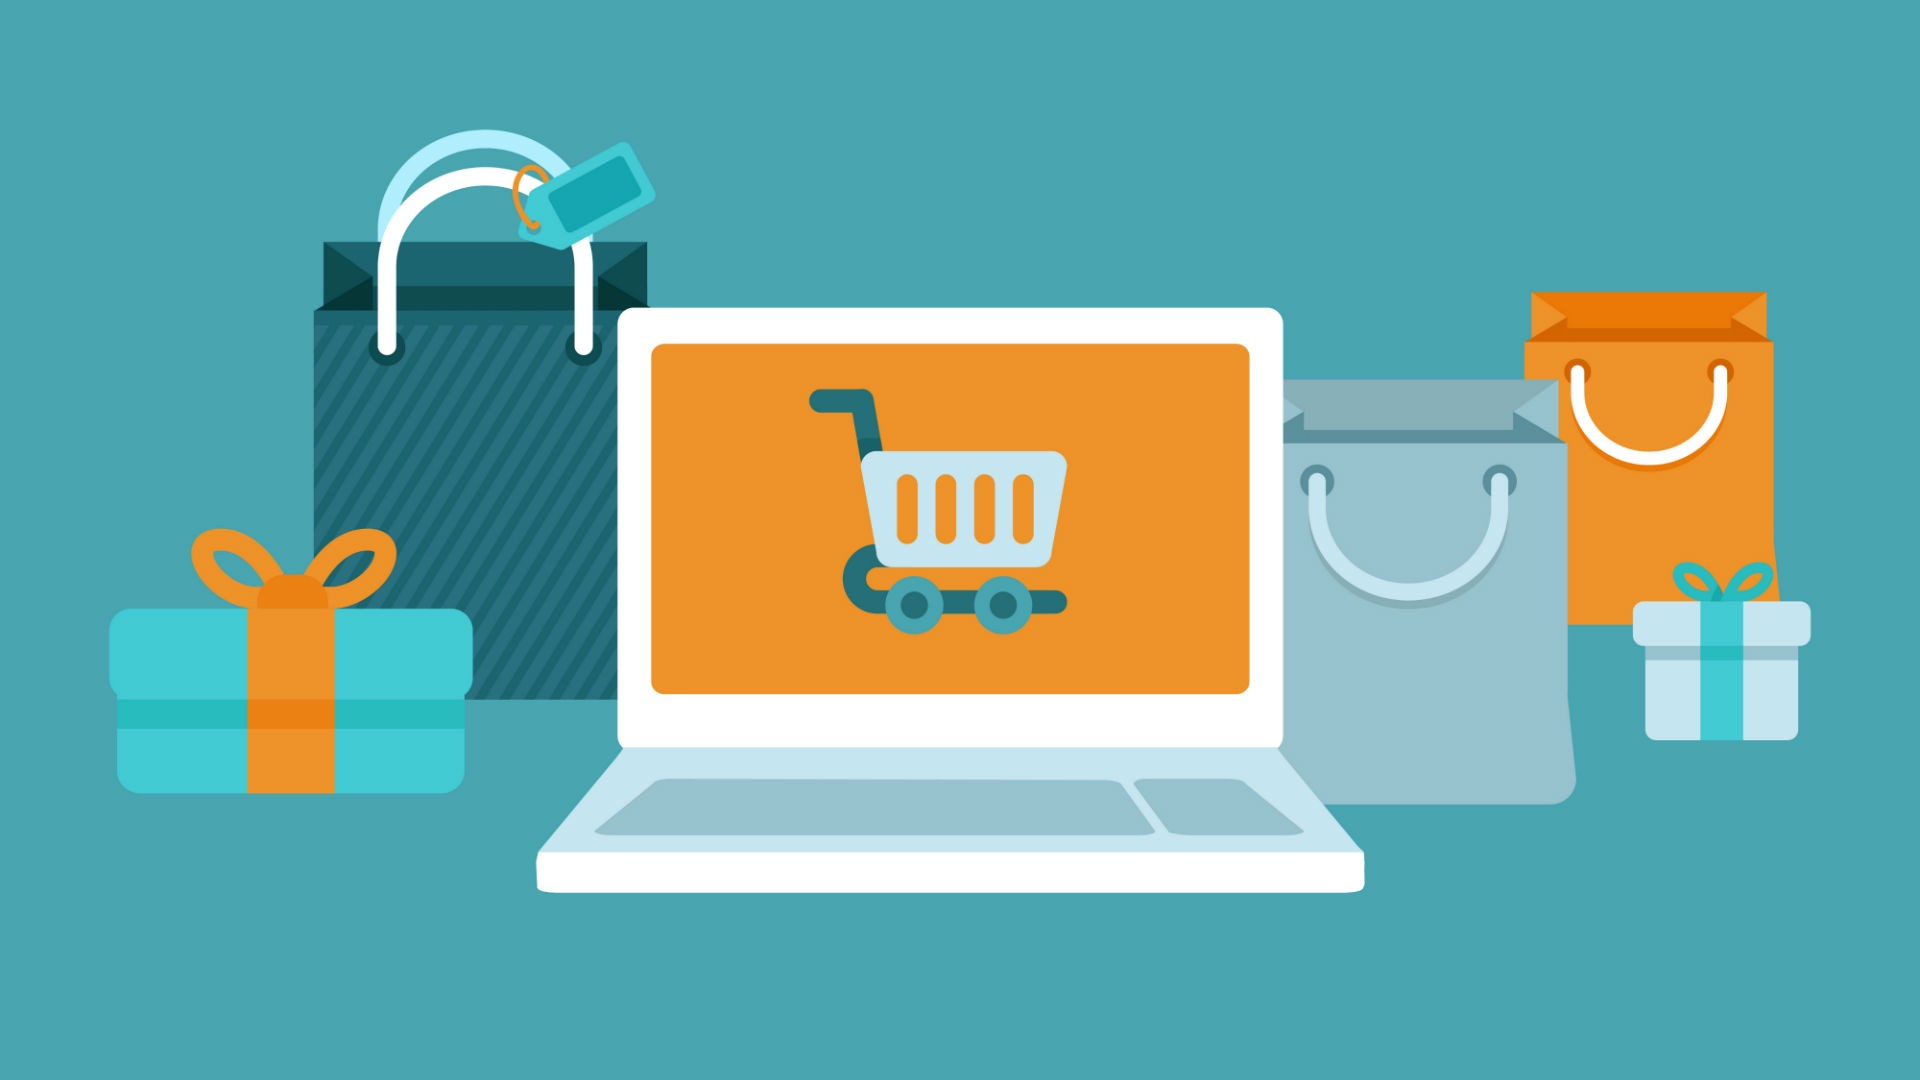

# Dataset description

This is a transnational dataset that contains all the transactions occurring between Nov-2016 to Dec-2017 for a UK-based online retail store.

Attribute Description
- InvoiceNo Invoice number (A 6-digit integral number uniquely assigned to each transaction)
- StockCode Product (item) code
- Description Product (item) name
- Quantity The quantities of each product (item) per transaction
- InvoiceDate The day when each transaction was generated
- UnitPrice Unit price (Product price per unit)
- CustomerID Customer number (Unique ID assigned to each customer)
- Country Country name (The name of the country where each customer resides)

# Analysis tasks to be performed:
Use the clustering to segment customers into groups

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

# Reading the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Clustering/Value customer Identification/Ecommerce.csv', parse_dates=['InvoiceDate'], encoding= 'unicode_escape')
print(df.shape)
df.head()

(541909, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Unnamed: 8   0 non-null       float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


# Cleaning & Preparation

In [ ]:
df = df.iloc[:, :-1]
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Year                0
Month               0
Day                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Year         541909 non-null  int64         
 9   Month        541909 non-null  int64         
 10  Day          541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 45.5+ MB


In [ ]:
# Drop missing rows
df.dropna(axis = 0, inplace = True)
print(df.shape)

(406829, 11)


In [ ]:
df['TotalIncome'] = df['Quantity'] * df['UnitPrice']

In [ ]:
# Drop rows with no income
no_income = df[df['TotalIncome'] <=0].index
df.drop(no_income, inplace = True)

In [ ]:
# Drop rows with no quantities
discard = df[df['Quantity'] <= 0].index
df.drop(discard, inplace=True )
df.shape

(397884, 12)

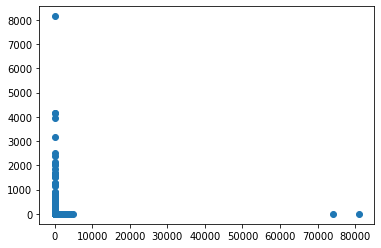

In [ ]:
# Checking for outliers using scatterplot
plt.scatter(df['Quantity'], df['UnitPrice'])
plt.show()

In [ ]:
df[df['UnitPrice'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalIncome
173382,551697,POST,POSTAGE,1,2017-05-01,8142.75,16029.0,United Kingdom,2017,5,1,8142.75


In [ ]:
df[df['Quantity'] > 20000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,TotalIncome
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2017-01-16,1.04,12346.0,United Kingdom,2017,1,16,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2017-12-07,2.08,16446.0,United Kingdom,2017,12,7,168469.6


In [ ]:
# Treat the extreme values as outliers and remove them
outliers = df[(df['UnitPrice'] > 5000) | (df['Quantity'] > 20000)].index
df.drop(outliers, inplace = True)
df.shape

(397881, 12)

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int').astype('category')

# Turning object columns into categories to reduce the used memory
categories = ['InvoiceNo', 'StockCode', 'Description', 'Country']
for c in categories:
    df[c] = df[c].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397881 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397881 non-null  category      
 1   StockCode    397881 non-null  category      
 2   Description  397881 non-null  category      
 3   Quantity     397881 non-null  int64         
 4   InvoiceDate  397881 non-null  datetime64[ns]
 5   UnitPrice    397881 non-null  float64       
 6   CustomerID   397881 non-null  category      
 7   Country      397881 non-null  category      
 8   Year         397881 non-null  int64         
 9   Month        397881 non-null  int64         
 10  Day          397881 non-null  int64         
 11  TotalIncome  397881 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(2), int64(4)
memory usage: 29.0 MB
None


# Data Exploration

In [ ]:
years = df['Year'].value_counts()
years

2017    371724
2016     26157
Name: Year, dtype: int64

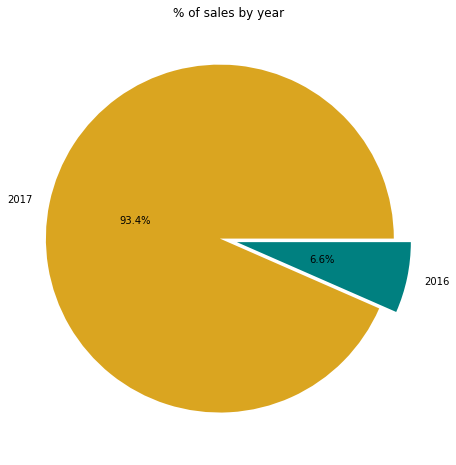

In [ ]:
pie, ax = plt.subplots(figsize=[12,8])
labels = ['2017', '2016']
colors = ['goldenrod', 'teal']
plt.pie(x = years, autopct='%.1f%%', explode=[0.05]*2, labels=labels, pctdistance=0.5, colors = colors)
plt.title('% of sales by year')
plt.show()

In [ ]:
# Separate sales by year
sales_16 = df[df['Year'] == 2016]
sales_17 = df[df['Year'] == 2017]

In [ ]:
monthly_16 = sales_16['Month'].value_counts()
monthly_16

12    22215
11     3942
Name: Month, dtype: int64

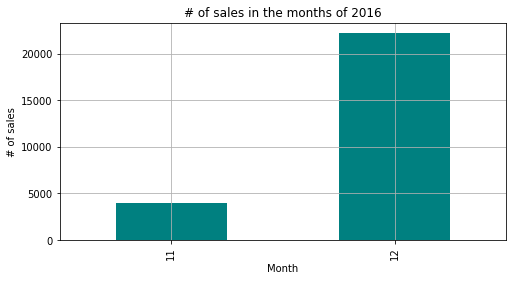

In [ ]:
plt.figure(figsize=(8,4))
monthly_16.sort_index().plot(color='teal', kind='bar')
plt.title('# of sales in the months of 2016')
plt.xlabel('Month')
plt.ylabel('# of sales')
plt.grid()

plt.show()

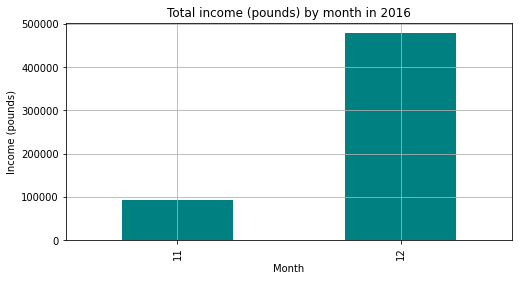

In [ ]:
cash_16 = sales_16.groupby('Month')['TotalIncome'].sum()


plt.figure(figsize=(8,4))
cash_16.sort_index().plot(kind='bar', color='teal')
plt.title('Total income (pounds) by month in 2016')
plt.xlabel('Month')
plt.ylabel('Income (pounds)')
plt.grid()
plt.show()

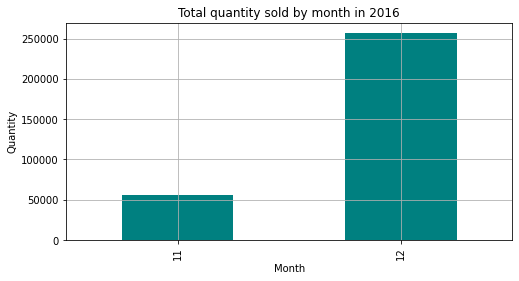

In [ ]:
quantity_16 = sales_16.groupby('Month')['Quantity'].sum()


plt.figure(figsize=(8,4))
quantity_16.sort_index().plot(kind='bar', color='teal')
plt.title('Total quantity sold by month in 2016')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid()
plt.show()

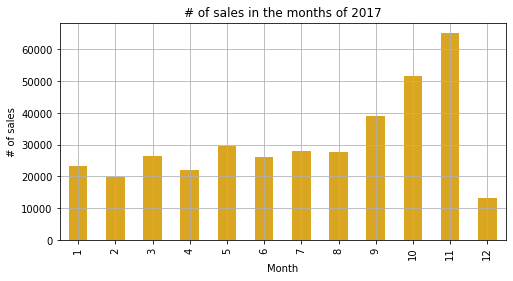

In [ ]:
monthly_17 = sales_17['Month'].value_counts()

plt.figure(figsize=(8,4))
monthly_17.sort_index().plot(kind='bar', color='goldenrod')
plt.title('# of sales in the months of 2017')
plt.xlabel('Month')
plt.ylabel('# of sales')
plt.grid()
plt.show()

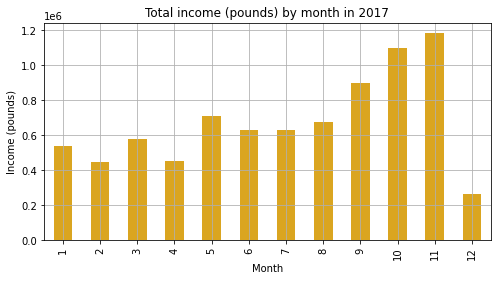

In [ ]:
cash_17 = sales_17.groupby('Month')['TotalIncome'].sum()


plt.figure(figsize=(8,4))
cash_17.sort_index().plot(kind='bar', color='goldenrod')
plt.title('Total income (pounds) by month in 2017')
plt.xlabel('Month')
plt.ylabel('Income (pounds)')
plt.grid()
plt.show()

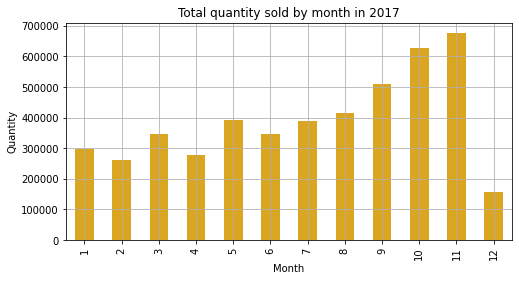

In [ ]:
quantity_17 = sales_17.groupby('Month')['Quantity'].sum()


plt.figure(figsize=(8,4))
quantity_17.sort_index().plot(kind='bar', color='goldenrod')
plt.title('Total quantity sold by month in 2017')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.grid()
plt.show()

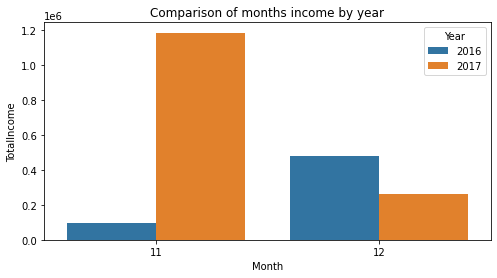

In [ ]:
months_comparison = df[(df['Month'] == 11) | (df['Month'] == 12)]

comparison = months_comparison.groupby(['Year', 'Month'])['TotalIncome'].sum()
comparison = comparison.reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=comparison, x='Month', y='TotalIncome', hue='Year')
plt.title('Comparison of months income by year')
plt.show()

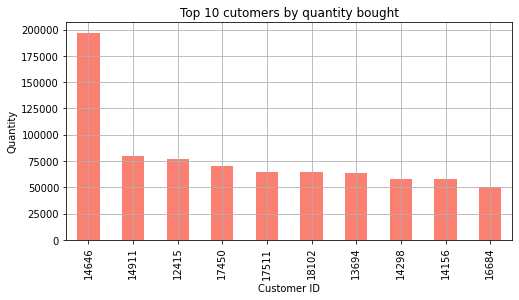

In [ ]:
top_customers = df.groupby('CustomerID')['Quantity'].sum()
top_customers = top_customers.sort_values(ascending=False).head(10)


plt.figure(figsize=(8,4))
top_customers.plot(kind='bar', color='salmon')
plt.title('Top 10 cutomers by quantity bought')
plt.xlabel('Customer ID')
plt.ylabel('Quantity')
plt.grid()
plt.show()

In [ ]:
df['Country'].value_counts().head()

United Kingdom    354318
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

As can be observerved, most of the customers are from UK since the online retail store is UK-based.

Let's visualize the count of customers from the other countries.

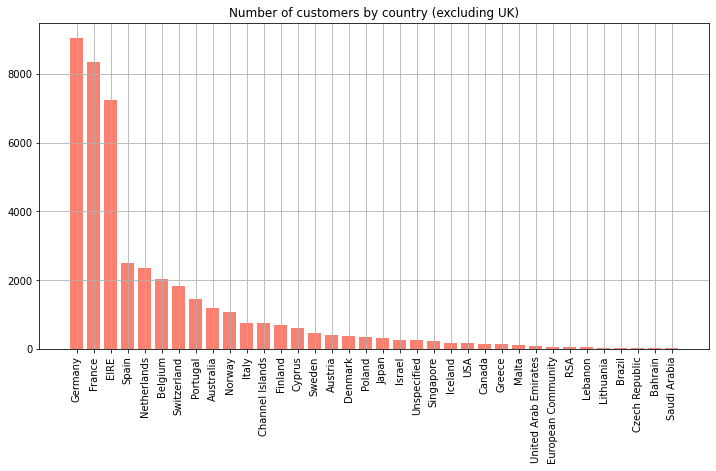

In [ ]:
countries = df['Country'].value_counts()[1:]
fig, ax = plt.subplots(figsize = (12,6))


ax.bar(countries.index, countries, color = 'salmon')
ax.set_xticklabels(countries.index, rotation = 90)
ax.set_title('Number of customers by country (excluding UK)')
ax.grid()
plt.show()

# Clustering

In [ ]:
# Features for clustering

customer_df = df.groupby('CustomerID').agg({'TotalIncome': ['mean','sum','max']})
data = pd.DataFrame(customer_df)
data.columns = ['Mean', 'Sum','Max']
data

,Mean,Sum,Max
CustomerID,,,
12347,23.681319,4310.00,249.60
12348,57.975484,1797.24,240.00
12349,24.076027,1757.55,300.00
12350,19.670588,334.40,40.00
12352,29.482824,2506.04,376.50
...,...,...,...
18280,18.060000,180.60,23.70
18281,11.545714,80.82,16.95
18282,14.837500,178.05,25.50


In [ ]:
features = customer_df.values

## Preprocessing

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[-0.05821298,  0.27111313,  0.17789037],
       [ 0.0850723 , -0.0233153 ,  0.16353626],
       [-0.05656384, -0.02796591,  0.25324944],
       ...,
       [-0.09516356, -0.21304117, -0.15718837],
       [-0.14557887,  0.01156016, -0.1642159 ],
       [-0.04749384, -0.01862368, -0.06523235]])

## Chosing number of cluster, K

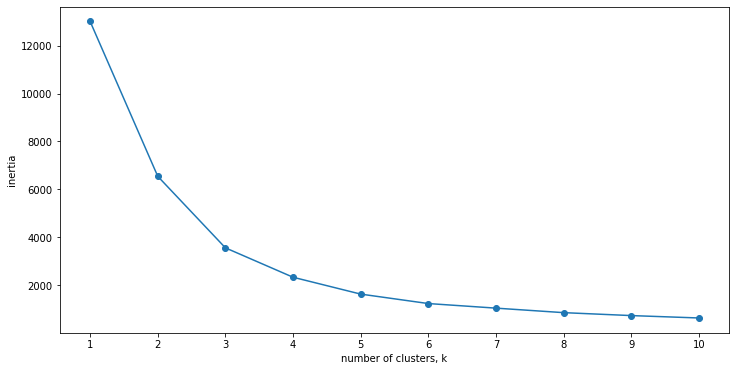

In [ ]:
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters= k)
    
    # Fit model to samples
    model.fit(scaled_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(12,6))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## Create the model

In [ ]:
MODEL = KMeans(n_clusters=3)

MODEL.fit(scaled_features)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
MODEL.inertia_

3557.7408674278563

In [ ]:
data['Cluster'] = MODEL.predict(scaled_features)
data.head()

,Mean,Sum,Max,Cluster
CustomerID,,,,
12347,23.681319,4310.00,249.6,0
12348,57.975484,1797.24,240.0,0
12349,24.076027,1757.55,300.0,0
12350,19.670588,334.40,40.0,0
12352,29.482824,2506.04,376.5,0


## Clusters plot

In [ ]:

px.scatter_3d(data_frame=data, x='Max', y='Mean', z='Sum', color='Cluster')